In [25]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [26]:
filename = "20200404_LWB_Client_Events_Month.csv"


In [27]:
fullData = pd.read_csv(filename)
#data = pd.read_csv(filename, nrows=1000)

/Users/miaoqinli/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (849,856,934,935,936,938,939,940,941,942,943,944,945,947,948,949,951,952,953,975,976,978,1008,1014,1029) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
column_of_allrows = fullData.filter(regex=r'^allrows', axis=1)
column_of_allrows.columns


Index(['allrows_client_row_natural_id', 'allrows_client_cirtsid_anon_hash',
       'allrows_client_regionid_anon_hash',
       'allrows_client_countryid_anon_hash', 'allrows_client_didexistprecirts',
       'allrows_client_isactive', 'allrows_client_statusreason',
       'allrows_client_createdbyid', 'allrows_client_keyworker_anon_hash',
       'allrows_client_clientinactivestatusreasonid',
       ...
       'allrows_keyworker_seifa_percentile_min_alltime',
       'allrows_client_age_at_event', 'allrows_client_maoridescent_string',
       'allrows_join_clientpostcode_seifa_score',
       'allrows_join_clientpostcode_seifa_ausrank',
       'allrows_join_clientpostcode_seifa_decile',
       'allrows_join_clientpostcode_seifa_percentile',
       'allrows_client_days_since_first_contact', 'allrows_client_current_age',
       'allrows_client_current_age_group'],
      dtype='object', length=231)

In [29]:
#drop non_numeric column，they are information of id,hash data,detail data and description data
numeric_column = column_of_allrows.drop(['allrows_diagnosis_primary_highest_severity_diagnosis_diagnosistypeid',
                                         'allrows_diagnosis_primary_highest_severity_diagnosis_diagnosiscategoryid',
                                         'allrows_diagnosis_primary_highest_severity_diagnosis_category_id',
                                         'allrows_diagnosis_primary_highest_severity_diagnosis_type_id',
                                         'allrows_datejoin_clientaddresschange_livingarrangementid',
                                         'allrows_datejoin_clientaddresschange_addresstypeid',
                                         'allrows_datejoin_clientaddresschange_state',
                                         'allrows_datejoin_clientaddresschange_livingarrangement_description',
                                         'allrows_datejoin_clientaddresschange_residentialsetting_description',
                                         'allrows_datejoin_client_best_address_addresstypeid',
                                         'allrows_datejoin_client_best_address_countryid',
                                         'allrows_datejoin_client_best_address_state',
                                         'allrows_client_row_natural_id','allrows_client_cirtsid_anon_hash',
                                         'allrows_client_regionid_anon_hash','allrows_client_countryid_anon_hash',
                                         'allrows_client_createdbyid','allrows_client_keyworker_anon_hash',
                                         'allrows_client_clientinactivestatusreasonid','allrows_client_sectorid_min',
                                         'allrows_client_sectormin_description_anon_hash','allrows_client_region_description_anon_hash',
                                         'allrows_client_stateid','allrows_client_countryid_allrow_latest',
                                         'allrows_client_state_anon_hash','allrows_client_row_natural_id_dup',
                                         'allrows_client_title_anon_hash','allrows_client_countryofbirthid',
                                         'allrows_client_placeofbirth_anon_hash','allrows_client_atsiid',
                                         'allrows_client_clanid','allrows_client_iwiid','allrows_client_iwiotherdetail',
                                         'allrows_client_ethnicityid','allrows_client_primarylanguageid',
                                         'allrows_client_secondarylanguageid','allrows_client_religionid',
                                         'allrows_diagnosis_primary_highest_severity_diagnosis_id',
                                         'allrows_diagnosis_primary_highest_severity_diagnosis_treatmentsummary',
                                         'allrows_event_type_detailed',
                                         'allrows_datejoin_clientaddresschange_livingarrangementotherdetail_anon_hash',
                                         'allrows_datejoin_clientaddresschange_residentialsettingid',
                                         'allrows_datejoin_clientaddresschange_residentialsettingotherdetail_anon_hash',
                                         'allrows_datejoin_clientaddresschange_address_description_anon_hash',
                                         'allrows_datejoin_clientaddresschange_suburb_anon_hash',
                                         'allrows_datejoin_clientaddresschange_postcode_anon_hash',
                                         'allrows_datejoin_clientaddresschange_countryid',
                                         'allrows_datejoin_placement_id','allrows_datejoin_placement_programid',
                                         'allrows_datejoin_placement_fundingcontractid','allrows_datejoin_placement_placementreasonid',
                                         'allrows_datejoin_placement_start_reasondesc_anon_hash','allrows_datejoin_servicetype_program_id',
                                         'allrows_datejoin_servicetype_program_servicetypeid','allrows_datejoin_servicetype_program_regionid',
                                         'allrows_datejoin_servicetype_program_reasonforentering_anon_hash',
                                         'allrows_datejoin_client_best_address_postcode_anon_hash',
                                         'allrows_datejoin_client_best_address_suburb_anon_hash'],axis=1)


In [30]:
# #delete all_nan column
numeric_column = numeric_column.dropna(axis=1,how='all')

In [31]:
#del rate_of_missing_value>99%(124293*0.99)
value_of_99perc = 124293*0.99
numeric_column = numeric_column.dropna(thresh=124293-value_of_99perc,axis=1)

In [41]:
#check the remainning_missing_rate
columns = numeric_column.columns
percent_missing = numeric_column.isnull().sum()*100/len(numeric_column)
missing_value_numeric_column = pd.DataFrame({'column_name':columns,'percent_missing':percent_missing})
print(missing_value_numeric_column)

                                                                               column_name  \
allrows_client_didexistprecirts                            allrows_client_didexistprecirts   
allrows_client_isactive                                            allrows_client_isactive   
allrows_client_statusreason                                    allrows_client_statusreason   
allrows_client_gender                                                allrows_client_gender   
allrows_client_dobestimated                                    allrows_client_dobestimated   
...                                                                                    ...   
allrows_join_clientpostcode_seifa_decile          allrows_join_clientpostcode_seifa_decile   
allrows_join_clientpostcode_seifa_percentile  allrows_join_clientpostcode_seifa_percentile   
allrows_client_days_since_first_contact            allrows_client_days_since_first_contact   
allrows_client_current_age                                  

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

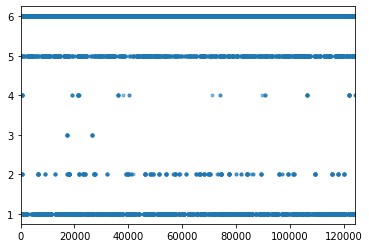

In [34]:
# deal with some "category", visualisation
numeric_column['allrows_client_statusreason'].plot(marker='.', alpha=0.5, linestyle='None')

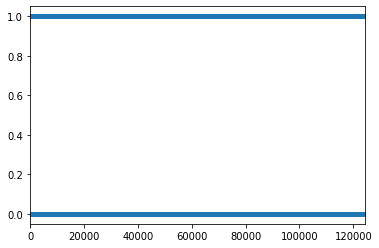

In [35]:
numeric_column['allrows_client_has_disability_diagnosis_bool'].plot(marker='.', alpha=0.5, linestyle='None')

In [36]:
#set nan = -1 or 0,
numeric_column['allrows_client_statusreason'].fillna(0,inplace=True)
numeric_column['allrows_client_has_disability_diagnosis_bool'].fillna(-1,inplace=True)

In [37]:
# deal with some "count"_column, set nan = 0
for i in numeric_column:
    numeric_column[i].fillna(0,inplace=True)

In [38]:
# #set category data into numeric data 1/0 true or false
numeric_column['allrows_event_type'].head(10)


0    progress_note_Case Discussion / Planning
1                            reference_active
2                     client_address_addition
3    progress_note_Case Discussion / Planning
4    progress_note_Case Discussion / Planning
5    progress_note_Case Discussion / Planning
6                            reference_active
7                            reference_active
8                            reference_active
9                            reference_active
Name: allrows_event_type, dtype: object

In [43]:
#spilt numeric_column['allrows_event_type'] into sub_category
new_allrows_event_type = pd.get_dummies(numeric_column['allrows_event_type'])
print(new_allrows_event_type)

        client_address_addition  client_alert_start  client_plan_end  \
0                             0                   0                0   
1                             0                   0                0   
2                             1                   0                0   
3                             0                   0                0   
4                             0                   0                0   
...                         ...                 ...              ...   
124288                        0                   0                0   
124289                        0                   0                0   
124290                        0                   0                0   
124291                        0                   0                0   
124292                        0                   0                0   

        client_plan_start  diagnosis_Complex Support Needs  \
0                       0                                0   
1          

In [44]:
# #set category data into numeric data 1/0 true or false
numeric_column['allrows_client_current_age_group'].head(10)


0    18 to 24
1    18 to 24
2    18 to 24
3    18 to 24
4    18 to 24
5    18 to 24
6    18 to 24
7    18 to 24
8    18 to 24
9    18 to 24
Name: allrows_client_current_age_group, dtype: object

In [45]:
new_allrows_client_current_age_group = pd.get_dummies(numeric_column['allrows_client_current_age_group'])
print(new_allrows_client_current_age_group)

        13 to 17  18 to 24  25 to 34  35 to 44  45 to 54  5 and under  \
0              0         1         0         0         0            0   
1              0         1         0         0         0            0   
2              0         1         0         0         0            0   
3              0         1         0         0         0            0   
4              0         1         0         0         0            0   
...          ...       ...       ...       ...       ...          ...   
124288         0         0         1         0         0            0   
124289         0         0         1         0         0            0   
124290         0         0         1         0         0            0   
124291         0         0         1         0         0            0   
124292         0         0         1         0         0            0   

        55 to 64  6 to 12  65 to 74  75 to 84  85 to 94  95 and over  
0              0        0         0         0       

In [46]:
numeric_column = numeric_column.drop(['allrows_event_type',
                                         'allrows_client_current_age_group'],axis=1)